In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image, display
import pydotplus
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm



df = pd.read_csv("../creditcard.csv")
df = df.sample(frac=1)
# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:5000]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
fraud_data = normal_distributed_df.sample(frac=1, random_state=42)


data = fraud_data.loc[:, fraud_data.columns != 'Class'] 
target = fraud_data.loc[:, fraud_data.columns == 'Class'] 
#print list(fraud_data)



In [8]:
# NUM_TIMS_TO_RUN=1
# class_weight='balanced'
# probability = True
# kernel= ['linear', 'rbf']
# import numpy as np

# sum_test_accuracy_list=np.array([0,0])
# sum_train_accuracy_list=np.array([0,0])
# train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.15)

# for j in range(NUM_TIMS_TO_RUN):
#     test_accuracy_list=[]
#     train_accuracy_list = []
#     counter=0
#     for i in kernel:
#         clf =  svm.SVC(kernel=i, cache_size= 1000)
#         #Fit train Data and test against test data
#         clf.fit(train_data, train_target)
#         test_accuracy_list.append([counter,clf.score(test_data,test_target)])
#         #print test_accuracy_list
#         #Ftest against training data
#         train_accuracy_list.append([counter,clf.score(train_data,train_target)])
#         counter=counter+1

    
#     sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
#     sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)

# avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
# avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN
# #print avg_test_prediction, avg_train_prediction

# plt.xlabel('Kernal')
# plt.ylabel('Accuracy')
# plt.ylim((.6,1))
# plt.xticks(avg_test_prediction[:,0],kernel)
# plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
# plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
# plt.title('Accuracy vs Kernal')
# plt.legend()
# plt.show()

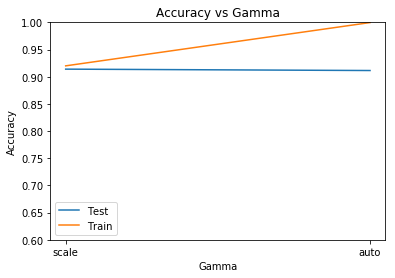

In [9]:
NUM_TIMS_TO_RUN=11

GAMMA=['scale','auto']
sum_test_accuracy_list=np.array([0,0])
sum_train_accuracy_list=np.array([0,0])

for j in range(NUM_TIMS_TO_RUN):
    test_accuracy_list=[]
    train_accuracy_list = []
    counter=0
    for i in GAMMA:
        clf =  svm.SVC(gamma=i)
        train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.15)
        #Fit train Data and test against test data
        clf.fit(train_data, train_target)
        test_accuracy_list.append([counter,clf.score(test_data,test_target)])
        #print test_accuracy_list
        #Ftest against training data
        train_accuracy_list.append([counter,clf.score(train_data,train_target)])
        counter=counter+1

    
    sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
    sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)

avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN
#print avg_test_prediction, avg_train_prediction

plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.ylim((.6,1))
plt.xticks(avg_test_prediction[:,0],GAMMA)
plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
plt.title('Accuracy vs Gamma')
plt.legend()
plt.show()

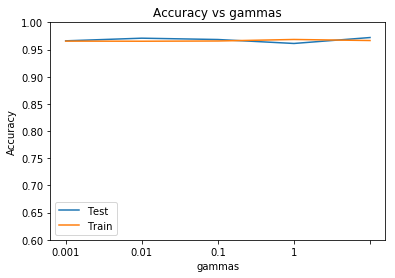

In [10]:
NUM_TIMS_TO_RUN=1
# rbf with these:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
#decision_function_shape : ['ovo', 'ovr']
sum_test_accuracy_list=np.array([0,0])
sum_train_accuracy_list=np.array([0,0])

for j in range(NUM_TIMS_TO_RUN):
    test_accuracy_list=[]
    train_accuracy_list = []
    counter=0
    for i in Cs:
        clf =  svm.SVC(kernel='linear', gamma=i)
        train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.15)
        #Fit train Data and test against test data
        clf.fit(train_data, train_target)
        test_accuracy_list.append([counter,clf.score(test_data,test_target)])
        #print test_accuracy_list
        #Ftest against training data
        train_accuracy_list.append([counter,clf.score(train_data,train_target)])
        counter=counter+1

    
    sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
    sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)

avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN
#print avg_test_prediction, avg_train_prediction

plt.xlabel('gammas')
plt.ylabel('Accuracy')
plt.ylim((.6,1))
plt.xticks(avg_test_prediction[:,0],gammas)
plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
plt.title('Accuracy vs gammas')
plt.legend()
plt.show()

C:\Users\rosha\Anaconda2\envs\skLearn\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rosha\Anaconda2\envs\skLearn\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


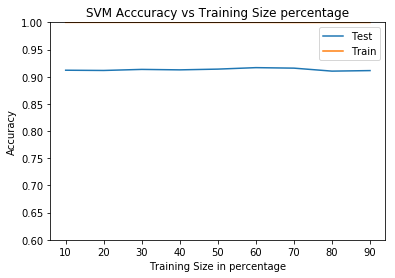

In [2]:
NUM_TIMS_TO_RUN=5
TRAIN_SIZE=10
sum_test_accuracy_list=np.array([0,0])
sum_train_accuracy_list=np.array([0,0])
for j in range(NUM_TIMS_TO_RUN):
    test_accuracy_list=[]
    train_accuracy_list = []
    for i in range(1,TRAIN_SIZE):
        clf = svm.SVC()
        #clf = tree.DecisionTreeClassifier()
        train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=1-i/10.0)
        clf.fit(train_data, train_target)
        #Fit train Data and test against test data
        clf.fit(train_data, train_target)
        test_accuracy_list.append([i*10,clf.score(test_data,test_target)])
        
        #Ftest against training data
        train_accuracy_list.append([i*10,clf.score(train_data,train_target)])
    sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
    sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)

avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN
#print avg_train_prediction, avg_test_prediction
plt.xlabel('Training Size in percentage')
plt.ylabel('Accuracy')
plt.ylim((0.6,1))
plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
plt.title('SVM Acccuracy vs Training Size percentage')
plt.legend()
plt.show()

[[ 10.           1.        ]
 [ 20.           1.        ]
 [ 30.           1.        ]
 [ 40.           0.99990893]
 [ 50.           0.99992717]
 [ 60.           0.9999393 ]
 [ 70.           0.99979188]
 [ 80.           0.99981789]
 [ 90.           0.99983812]] [[ 10.           0.9119563 ]
 [ 20.           0.9115157 ]
 [ 30.           0.91344603]
 [ 40.           0.91262136]
 [ 50.           0.91398398]
 [ 60.           0.9167046 ]
 [ 70.           0.9157767 ]
 [ 80.           0.91028207]
 [ 90.           0.91127273]]


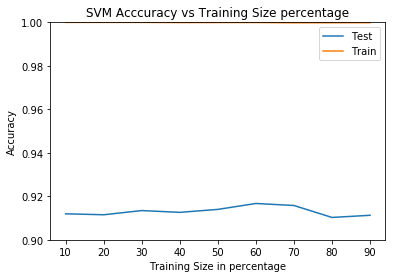

In [6]:
print avg_train_prediction, avg_test_prediction

plt.xlabel('Training Size in percentage')
plt.ylabel('Accuracy')
plt.ylim((0.9,1))
plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
plt.title('SVM Acccuracy vs Training Size percentage')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn import svm


train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.25)

skf = StratifiedKFold(n_splits = 5, shuffle=True, random_state=268)


decision_function_shape = ['ovo', 'ovr']
gammas = [0.001, 0.01, 0.1, 1]
class_weight=['balanced', None]
probability = [True, False]
kernel= ['linear', 'rbf']

param_grid = {'kernel' : kernel,
              'gamma' : gammas,
              'probability':probability, 
              'class_weight':class_weight
                }

#create a grid
grid_tree = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, scoring = 'accuracy', n_jobs=-1, cv=skf)

#training
%time grid_tree.fit(train_data, train_target)

#let's see the best estimator
best_tree = grid_tree.best_estimator_
print(best_tree)
print("_"*40)
#with its score
print("Cross-validated best score {}%".format(round(grid_tree.best_score_ * 100,3)))
#score on test
predictions = best_tree.predict(test_data)
print("Test score: {}%".format(round(accuracy_score(y_true = test_target, y_pred = predictions) * 100,3)))

